In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time
import datetime

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [3]:
# !pip install joblib

In [4]:
df = pd.read_csv('../data/df_eng.csv', low_memory=False)
df.shape

(138262, 59)

In [5]:
df_clean = df.dropna()

In [6]:
df_clean.columns

Index(['price_id', 'daily_price', 'weekly_price', 'cleaning_fee',
       'security_deposit', 'availability_id', 'availability_30',
       'availability_60', 'availability_90', 'amenity_id', 'wireless_Internet',
       'air_conditioning', 'pool', 'self_check_in', 'private_entrance',
       'breakfast', 'free_parking_on_premises', 'tv', 'gym', 'hot_tub',
       'indoor_fireplace', 'heating', 'family_kid_friendly', 'washer', 'dryer',
       'hangers', 'iron', 'shampoo', 'hair_dryer', 'high_chair', 'crib',
       'carbon_monoxide_detector', 'smoke_detector',
       'babysitter_recommendations', 'pets_allowed', 'first_aid_kit',
       'host_id', 'host_since', 'host_is_superhost', 'host_response_time',
       'property_id', 'number_of_reviews', 'review_scores_rating', 'comments',
       'neighborhood_id', 'listing_description', 'property_type', 'bedrooms',
       'bathrooms', 'accommodates', 'beds', 'room_type', 'minimum_nights',
       'maximum_nights', 'latitude', 'longitude', 'neighbourho

In [7]:
df_drop = df.drop(columns=['host_since', 'host_response_time','comments','listing_description','property_type','zipcode','language','price_id','availability_id','amenity_id', 'neighborhood_id','host_id'])

In [8]:
df_drop

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,bedrooms,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood
0,115.0,735.0,50.0,100.0,6,11,18,1,1,0,...,2.0,1.0,6,4.0,Entire home/apt,1,1125,34.032294,-118.304134,Adams-Normandie
1,115.0,735.0,50.0,100.0,6,11,18,1,1,0,...,2.0,1.0,6,4.0,Entire home/apt,1,1125,34.032294,-118.304134,Adams-Normandie
2,115.0,735.0,50.0,100.0,6,11,18,1,1,0,...,2.0,1.0,6,4.0,Entire home/apt,1,1125,34.032294,-118.304134,Adams-Normandie
3,115.0,735.0,50.0,100.0,6,11,18,1,1,0,...,2.0,1.0,6,4.0,Entire home/apt,1,1125,34.032294,-118.304134,Adams-Normandie
4,115.0,735.0,50.0,100.0,6,11,18,1,1,0,...,2.0,1.0,6,4.0,Entire home/apt,1,1125,34.032294,-118.304134,Adams-Normandie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138257,55.0,400.0,45.0,150.0,30,60,90,1,1,0,...,1.0,1.0,1,1.0,Private room,2,1125,34.161427,-118.615453,Woodland Hills
138258,55.0,400.0,45.0,150.0,30,60,90,1,1,0,...,1.0,1.0,1,1.0,Private room,2,1125,34.161427,-118.615453,Woodland Hills
138259,55.0,400.0,45.0,150.0,30,60,90,1,1,0,...,1.0,1.0,1,1.0,Private room,2,1125,34.161427,-118.615453,Woodland Hills
138260,55.0,400.0,45.0,150.0,30,60,90,1,1,0,...,1.0,1.0,1,1.0,Private room,2,1125,34.161427,-118.615453,Woodland Hills


In [9]:
df_price_hoods = df_drop.groupby('neighbourhood', as_index=False)['daily_price'].mean()

In [10]:
df_price_hoods

,neighbourhood,daily_price
0,Adams-Normandie,82.044888
1,Agoura Hills,112.763819
2,Agua Dulce,120.000000
3,Alhambra,88.700207
4,Altadena,89.869256
...,...,...
143,Westwood,147.482091
144,Whittier,137.428000
145,Windsor Square,99.034483
146,Winnetka,164.618497


In [11]:
top_10 = df_price_hoods.nlargest(10,"daily_price")

In [12]:
top_10

,neighbourhood,daily_price
8,Avalon,550.000000
128,Unincorporated Santa Monica Mountains,430.408367
23,Castaic Canyons,395.000000
49,Green Valley,395.000000
13,Beverly Grove,391.216535
76,Malibu,386.255222
59,Hollywood Hills West,367.767669
31,Diamond Bar,357.000000
77,Manhattan Beach,326.903172
97,Playa del Rey,313.222826


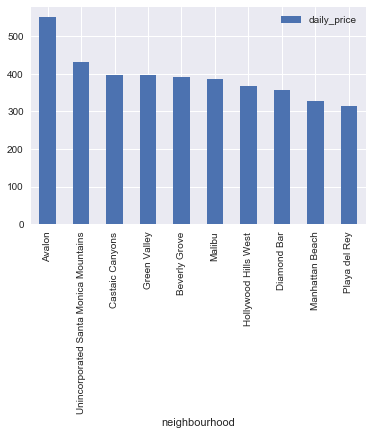

In [13]:
top_10.plot(kind='bar', x='neighbourhood', y='daily_price')

In [14]:
top_10_list = top_10['neighbourhood'].to_list()

In [15]:
top_10_list

['Avalon',
 'Unincorporated Santa Monica Mountains',
 'Castaic Canyons',
 'Green Valley',
 'Beverly Grove',
 'Malibu',
 'Hollywood Hills West',
 'Diamond Bar',
 'Manhattan Beach',
 'Playa del Rey']

In [16]:
new_df = df_drop[df_drop['neighbourhood'].isin(top_10_list)]

In [17]:
new_df

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,bedrooms,bathrooms,accommodates,beds,room_type,minimum_nights,maximum_nights,latitude,longitude,neighbourhood
5689,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,2.0,2.0,6,4.0,Entire home/apt,2,1125,33.352341,-118.331245,Avalon
5690,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,2.0,2.0,6,4.0,Entire home/apt,2,1125,33.352341,-118.331245,Avalon
5691,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,2.0,2.0,6,4.0,Entire home/apt,2,1125,33.352341,-118.331245,Avalon
5692,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,2.0,2.0,6,4.0,Entire home/apt,2,1125,33.352341,-118.331245,Avalon
5693,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,2.0,2.0,6,4.0,Entire home/apt,2,1125,33.352341,-118.331245,Avalon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112616,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,4.0,3.0,8,4.0,Entire home/apt,3,1125,34.079541,-118.634503,Unincorporated Santa Monica Mountains
112617,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,4.0,3.0,8,4.0,Entire home/apt,3,1125,34.079541,-118.634503,Unincorporated Santa Monica Mountains
112618,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,4.0,3.0,8,4.0,Entire home/apt,3,1125,34.079541,-118.634503,Unincorporated Santa Monica Mountains
112619,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,4.0,3.0,8,4.0,Entire home/apt,3,1125,34.079541,-118.634503,Unincorporated Santa Monica Mountains


In [18]:
bd_price=new_df['daily_price']

In [19]:
bd_price

5689       550.0
5690       550.0
5691       550.0
5692       550.0
5693       550.0
           ...  
112616    1120.0
112617    1120.0
112618    1120.0
112619    1120.0
112620    1120.0
Name: daily_price, Length: 7741, dtype: float64

In [20]:
# get dummy
data_encoded = pd.get_dummies(new_df, columns=["room_type","neighbourhood"])

In [21]:
data_encoded

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,neighbourhood_Avalon,neighbourhood_Beverly Grove,neighbourhood_Castaic Canyons,neighbourhood_Diamond Bar,neighbourhood_Green Valley,neighbourhood_Hollywood Hills West,neighbourhood_Malibu,neighbourhood_Manhattan Beach,neighbourhood_Playa del Rey,neighbourhood_Unincorporated Santa Monica Mountains
5689,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5690,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5691,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5692,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5693,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112616,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,0,1
112617,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,0,1
112618,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,0,1
112619,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
data_encoded.dtypes

daily_price                                            float64
weekly_price                                           float64
cleaning_fee                                           float64
security_deposit                                       float64
availability_30                                          int64
availability_60                                          int64
availability_90                                          int64
wireless_Internet                                        int64
air_conditioning                                         int64
pool                                                     int64
self_check_in                                            int64
private_entrance                                         int64
breakfast                                                int64
free_parking_on_premises                                 int64
tv                                                       int64
gym                                                    

In [23]:
# gather all the PCA components
# rename the PC columns
pc_col_names = ["pc_" + item for item in list(data_encoded.columns[10:])]

# extract the 50 principal components
pc_data = data_encoded.iloc[:, 10:]

# rename the columns
pc_data.columns = pc_col_names

In [24]:
pc_data.shape

(7741, 47)

In [25]:
pc_data.head()

,pc_self_check_in,pc_private_entrance,pc_breakfast,pc_free_parking_on_premises,pc_tv,pc_gym,pc_hot_tub,pc_indoor_fireplace,pc_heating,pc_family_kid_friendly,...,pc_neighbourhood_Avalon,pc_neighbourhood_Beverly Grove,pc_neighbourhood_Castaic Canyons,pc_neighbourhood_Diamond Bar,pc_neighbourhood_Green Valley,pc_neighbourhood_Hollywood Hills West,pc_neighbourhood_Malibu,pc_neighbourhood_Manhattan Beach,pc_neighbourhood_Playa del Rey,pc_neighbourhood_Unincorporated Santa Monica Mountains
5689,0,1,0,0,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5690,0,1,0,0,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5691,0,1,0,0,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5692,0,1,0,0,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5693,0,1,0,0,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
pc_data.dtypes

pc_self_check_in                                            int64
pc_private_entrance                                         int64
pc_breakfast                                                int64
pc_free_parking_on_premises                                 int64
pc_tv                                                       int64
pc_gym                                                      int64
pc_hot_tub                                                  int64
pc_indoor_fireplace                                         int64
pc_heating                                                  int64
pc_family_kid_friendly                                      int64
pc_washer                                                   int64
pc_dryer                                                    int64
pc_hangers                                                  int64
pc_iron                                                     int64
pc_shampoo                                                  int64
pc_hair_dr

In [27]:
from sklearn.cluster import KMeans
# Fit Kmeans and calculate SSE for each k value
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pc_data)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers

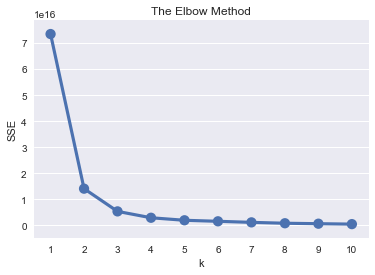

In [28]:
# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pc_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [30]:
predicted_clusters = kmeans.predict(pc_data)

In [31]:
predicted_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
centers = kmeans.cluster_centers_
centers

array([[ 2.88433382e-01,  2.02928258e-01,  8.96046852e-02,
         9.65446559e-01,  8.98389458e-01,  2.34260615e-02,
         1.87115666e-01,  4.14348463e-01,  9.83308931e-01,
         7.67203514e-01,  9.63689605e-01,  9.63689605e-01,
         7.20058565e-01,  6.99853587e-01,  6.47437775e-01,
         6.97803807e-01, -9.15933995e-16,  2.84040996e-02,
         6.64128843e-01,  7.99121523e-01,  0.00000000e+00,
         1.79795022e-01,  3.41142020e-01,  4.82869693e-01,
         1.27173290e+06,  6.45935578e+01,  9.52108346e+01,
         2.04070278e+00,  1.84421669e+00,  4.89194729e+00,
         2.63572474e+00,  2.84568082e+00,  4.58922108e+02,
         3.40626809e+01, -1.18496526e+02,  8.76720351e-01,
         1.23279649e-01, -4.78783679e-16,  1.36749634e-01,
         8.58688121e-17,  2.63543192e-03,  1.50227053e-15,
         3.90043924e-01,  2.54465593e-01,  4.80234261e-02,
         3.77745242e-02,  1.30307467e-01],
       [ 3.27362293e-01,  5.30228392e-01,  5.64263323e-02,
         8.53

In [33]:
cluster_labels = kmeans.labels_
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
# neighborhood in LA is spread out.
kmeans.score(pc_data)

-5375355767452216.0

In [35]:
# We can use cluster number 3 based on Elbow graph where we see a sharp decrease or reuse the kmeans.labels_ as number of clusters. 

In [36]:
# get the labels
cluster_labels = kmeans.labels_

# assign these clusters back into the dataframe
pc_data_k3 = pc_data.assign(cluster=cluster_labels)

# display the shape
pc_data_k3.shape

(7741, 48)

In [37]:
pc_data_k3.head()

,pc_self_check_in,pc_private_entrance,pc_breakfast,pc_free_parking_on_premises,pc_tv,pc_gym,pc_hot_tub,pc_indoor_fireplace,pc_heating,pc_family_kid_friendly,...,pc_neighbourhood_Beverly Grove,pc_neighbourhood_Castaic Canyons,pc_neighbourhood_Diamond Bar,pc_neighbourhood_Green Valley,pc_neighbourhood_Hollywood Hills West,pc_neighbourhood_Malibu,pc_neighbourhood_Manhattan Beach,pc_neighbourhood_Playa del Rey,pc_neighbourhood_Unincorporated Santa Monica Mountains,cluster
5689,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5690,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5691,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5692,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5693,0,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
pc_data_k3.cluster.value_counts()

0    3415
1    2233
2    2093
Name: cluster, dtype: int64

In [39]:
# Combine cluster data and original dataset for visualizations

In [40]:
other_col_names = list(data_encoded.columns[:])
other_col_names

['daily_price',
 'weekly_price',
 'cleaning_fee',
 'security_deposit',
 'availability_30',
 'availability_60',
 'availability_90',
 'wireless_Internet',
 'air_conditioning',
 'pool',
 'self_check_in',
 'private_entrance',
 'breakfast',
 'free_parking_on_premises',
 'tv',
 'gym',
 'hot_tub',
 'indoor_fireplace',
 'heating',
 'family_kid_friendly',
 'washer',
 'dryer',
 'hangers',
 'iron',
 'shampoo',
 'hair_dryer',
 'high_chair',
 'crib',
 'carbon_monoxide_detector',
 'smoke_detector',
 'babysitter_recommendations',
 'pets_allowed',
 'first_aid_kit',
 'host_is_superhost',
 'property_id',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'bathrooms',
 'accommodates',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'latitude',
 'longitude',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'neighbourhood_Avalon',
 'neighbourhood_Beverly Grove',
 'neighbourhood_Castaic Canyons',
 'neighbourhood_Diamond Bar',
 'neighbourhood_Green Valley',
 'neighbourhood_Hollywood Hills 

In [41]:
k_means_visual = data_encoded[other_col_names]
k_means_visual.shape

(7741, 57)

In [42]:
k_means_visual = k_means_visual.assign(cluster=cluster_labels)
k_means_visual.head()

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,neighbourhood_Beverly Grove,neighbourhood_Castaic Canyons,neighbourhood_Diamond Bar,neighbourhood_Green Valley,neighbourhood_Hollywood Hills West,neighbourhood_Malibu,neighbourhood_Manhattan Beach,neighbourhood_Playa del Rey,neighbourhood_Unincorporated Santa Monica Mountains,cluster
5689,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5690,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5691,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5692,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5693,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
k_means_visual.shape

(7741, 58)

In [44]:
k_means_visual.to_csv('k_means_visual.csv', index=False)

In [45]:
# !pip install folium

In [46]:
import os
import geopandas as gpd
import folium

In [47]:
k_means_visual

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,neighbourhood_Beverly Grove,neighbourhood_Castaic Canyons,neighbourhood_Diamond Bar,neighbourhood_Green Valley,neighbourhood_Hollywood Hills West,neighbourhood_Malibu,neighbourhood_Manhattan Beach,neighbourhood_Playa del Rey,neighbourhood_Unincorporated Santa Monica Mountains,cluster
5689,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5690,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5691,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5692,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5693,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112616,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,1,1
112617,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,1,1
112618,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,1,1
112619,1120.0,6000.0,350.0,2500.0,0,3,15,1,1,1,...,0,0,0,0,0,0,0,0,1,1


In [48]:
map_df_1 = gpd.read_file('../data/neighbourhoods.geojson')
map_df_1.head()

,neighbourhood,neighbourhood_group,geometry
0,Angeles Crest,Unincorporated Areas,"MULTIPOLYGON (((-118.09667 34.47348, -118.0796..."
1,Acton,Unincorporated Areas,"MULTIPOLYGON (((-118.20703 34.53902, -118.1894..."
2,Agua Dulce,Unincorporated Areas,"MULTIPOLYGON (((-118.37822 34.48811, -118.3783..."
3,Athens,Unincorporated Areas,"MULTIPOLYGON (((-118.29152 33.93096, -118.2916..."
4,Alondra Park,Unincorporated Areas,"MULTIPOLYGON (((-118.32651 33.89757, -118.3264..."


In [49]:
map_df_new = map_df_1[map_df_1['neighbourhood'].isin(top_10_list)]

In [50]:
map_df_new.head(10)

,neighbourhood,neighbourhood_group,geometry
21,Green Valley,Unincorporated Areas,"MULTIPOLYGON (((-118.39453 34.63058, -118.3944..."
34,Castaic Canyons,Unincorporated Areas,"MULTIPOLYGON (((-118.43807 34.43349, -118.4382..."
55,Unincorporated Santa Monica Mountains,Unincorporated Areas,"MULTIPOLYGON (((-118.75642 34.14076, -118.7480..."
65,Avalon,Other Cities,"MULTIPOLYGON (((-118.33173 33.35633, -118.3313..."
90,Diamond Bar,Other Cities,"MULTIPOLYGON (((-117.78518 34.03243, -117.7851..."
109,Malibu,Other Cities,"MULTIPOLYGON (((-118.87059 34.05207, -118.8705..."
110,Manhattan Beach,Other Cities,"MULTIPOLYGON (((-118.41841 33.90371, -118.4174..."
160,Hollywood Hills West,City of Los Angeles,"MULTIPOLYGON (((-118.36951 34.12920, -118.3675..."
184,Beverly Grove,City of Los Angeles,"MULTIPOLYGON (((-118.37249 34.08575, -118.3724..."
237,Playa del Rey,City of Los Angeles,"MULTIPOLYGON (((-118.42740 33.96765, -118.4264..."


In [51]:
# construct a geodataframe
k_means_map_geo = gpd.GeoDataFrame(k_means_visual, geometry=gpd.points_from_xy(k_means_visual.longitude,
                                                                            k_means_visual.latitude))

In [52]:
k_means_map_geo.head()

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,neighbourhood_Castaic Canyons,neighbourhood_Diamond Bar,neighbourhood_Green Valley,neighbourhood_Hollywood Hills West,neighbourhood_Malibu,neighbourhood_Manhattan Beach,neighbourhood_Playa del Rey,neighbourhood_Unincorporated Santa Monica Mountains,cluster,geometry
5689,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,1,POINT (-118.33125 33.35234)
5690,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,1,POINT (-118.33125 33.35234)
5691,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,1,POINT (-118.33125 33.35234)
5692,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,1,POINT (-118.33125 33.35234)
5693,550.0,2800.0,175.0,1000.0,21,35,43,1,0,1,...,0,0,0,0,0,0,0,0,1,POINT (-118.33125 33.35234)


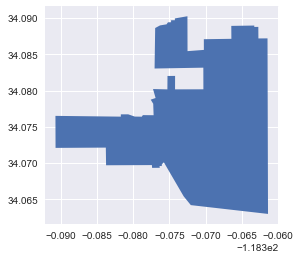

In [53]:
# get long beach neighborhood
Beverly_Grove = map_df_new[map_df_new.neighbourhood == 'Beverly Grove'].geometry
ax2=Beverly_Grove.plot()

In [54]:
k_means_map_geo['neighbourhood'] = map_df_new['neighbourhood']

In [55]:
k_means_map_geo.shape

(7741, 60)

In [56]:
BH_listings = k_means_map_geo[k_means_map_geo['neighbourhood_Beverly Grove']==1]
BH_listings

,daily_price,weekly_price,cleaning_fee,security_deposit,availability_30,availability_60,availability_90,wireless_Internet,air_conditioning,pool,...,neighbourhood_Diamond Bar,neighbourhood_Green Valley,neighbourhood_Hollywood Hills West,neighbourhood_Malibu,neighbourhood_Manhattan Beach,neighbourhood_Playa del Rey,neighbourhood_Unincorporated Santa Monica Mountains,cluster,geometry,neighbourhood
6690,265.0,1813.0,100.0,500.0,30,53,78,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.37895 34.07122),NaN
6691,265.0,1813.0,100.0,500.0,30,53,78,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.37895 34.07122),NaN
6692,265.0,1813.0,100.0,500.0,30,53,78,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.37895 34.07122),NaN
6693,265.0,1813.0,100.0,500.0,30,53,78,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.37895 34.07122),NaN
6694,265.0,1813.0,100.0,500.0,30,53,78,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.37895 34.07122),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7701,295.0,2250.0,100.0,1500.0,29,59,89,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.36177 34.06520),NaN
7702,295.0,2250.0,100.0,1500.0,29,59,89,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.36177 34.06520),NaN
7703,295.0,2250.0,100.0,1500.0,29,59,89,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.36177 34.06520),NaN
7704,295.0,2250.0,100.0,1500.0,29,59,89,1,1,0,...,0,0,0,0,0,0,0,0,POINT (-118.36177 34.06520),NaN


In [57]:
m = folium.Map(location=[34.0735, -118.3766], zoom_start=14)
folium.GeoJson('../data/neighbourhoods.geojson').add_to(m)
# Build markers and popups
for index, row in BH_listings.iterrows():
    row_values = row[1]
#     center_point = row_values['geometry']
    location = [float(row['latitude']), float(row['longitude'])]
    if row['cluster'] == 0:
        marker_color = 'lightred'
    elif row['cluster'] == 1:
        marker_color = 'cadetblue'
    else:
        marker_color = 'lightgreen'
    popup = ('Pool: ' + str(row['pool']) +
             '  ' + 'PRICE: $' + str(row['daily_price']))
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color=marker_color, icon='home'))
    marker.add_to(m)

display(m)